# Demonstration of charge trapping and ramp effect in HST/WFC3

Following is a demonstration of RECTE, a physically-motivated model for the charge trapping/ramp effect. 

Ramp effect is the most prominent systematics for WFC3/IR detector (as well as other HgCdTe based detectors) in the time-series observation mode. It appears as an exponentially-rising ($exp(-t)$) shaped light curve. The typcial amplitude for the ramp is on the order of 1% in the first orbit and reduces to less than 0.5% for the subsequent orbit. Ramp effect systematics removal is critical for accurately measuring transit depths and spectra for transitting exoplanets

In Zhou et al. (2017), we consider the charge trapping processes in the WFC3/IR detector and created RECTE. The essense of RECTE is that a fraction of stmulated charges (by incoming radiation) are trapped by in the detector rather than being detected due to detector defects.

Describe the parameters

Following demonstration consists of two parts. The first part is to demonstrate how parameters that descriebe the intrument defects affect the shape of the ramp. The second part is to demonstrate how parameters that related to each observation can affect the ramp profile.

In [ ]:
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
from rampLightCurve import rampModel, rampCorrection

%matplotlib notebook

## Demonstration 1

<IPython.core.display.Javascript object>


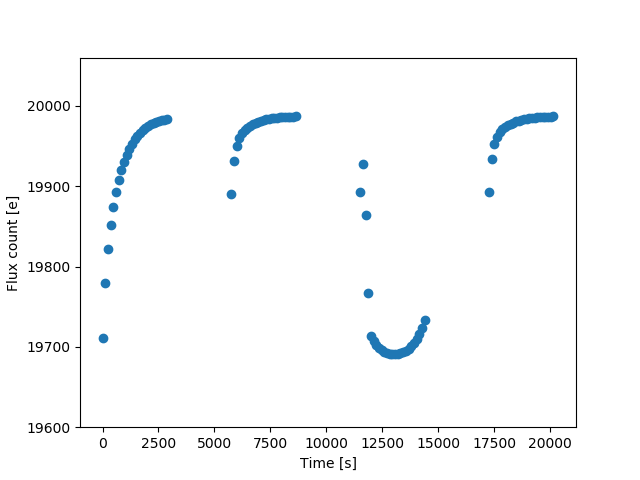

interactive(children=(FloatText(value=1500.0, description='slow N', step=100.0), FloatText(value=0.012, descri…

In [17]:
def rampModelPlot(
    nTrap_s,
    eta_s,
    tau_s,
    nTrap_f,
    eta_f,
    tau_f):
    crate = 200  # electron per second
    exptime = 100  # second
    lc, t = rampCorrection(
        nTrap_s,
        eta_s,
        tau_s,
        nTrap_f,
        eta_f,
        tau_f,
        crate,
        exptime
    )
    fig = plt.gcf()
    plt.cla()
    plt.plot(t, lc, 'o')
    plt.xlabel('Time [s]')
    plt.ylabel('Flux count [e]')
    plt.ylim(crate*exptime * 0.98, crate*exptime*1.003)
    plt.draw()
    
trap_s = widgets.FloatText(min=1000, max=3000, value=1500, step=100, 
                           description='slow N')
trap_f = widgets.FloatText(min=50, max=500, value=300, step=50, 
                           description='fast N')
eta_s = widgets.FloatText(min=0.005, max=0.02, value=0.012, step=0.001, 
                           description='slow eta')
eta_f = widgets.FloatText(min=0.001, max=0.01, value=0.005, step=0.001, 
                           description='fast eta')
tau_s = widgets.FloatText(min=6000, max=30000, value=15000, step=2000, 
                           description='slow tau')
tau_f = widgets.FloatText(min=50, max=500, value=200, step=50, 
                           description='fast tau')

plt.figure()
interactive_plot = interactive(rampModelPlot,
                               nTrap_s=trap_s,
                               eta_s=eta_s,
                               tau_s=tau_s,
                               nTrap_f=trap_f,
                               eta_f=eta_f,
                               tau_f=tau_f,
                               continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

## Demonstration 2

<IPython.core.display.Javascript object>


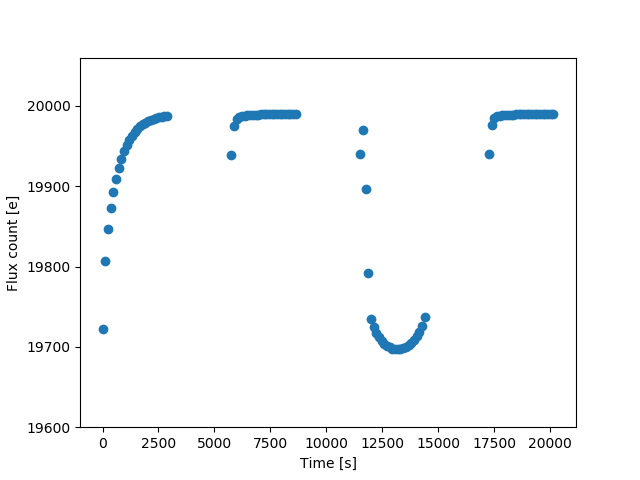

interactive(children=(FloatSlider(value=50.0, description='slow initial', max=500.0, step=50.0), FloatSlider(v…

In [21]:
def rampCorrectionPlot(
    trap_pop_s,
    trap_pop_f,
    dTrap_s,
    dTrap_f):
    crate = 200  # electron per second
    exptime = 100  # second
    lc, t = rampCorrection(
        crate,
        exptime,
        trap_pop_s,
        trap_pop_f,
        dTrap_s,
        dTrap_f,
    )
    fig = plt.gcf()
    plt.cla()
    plt.plot(t, lc, 'o')
    plt.xlabel('Time [s]')
    plt.ylabel('Flux count [e]')
    plt.ylim(crate*exptime * 0.98, crate*exptime*1.003)
    plt.draw()
    
trap_pop_s = widgets.FloatSlider(min=0, max=500, value=50, step=50, 
                           description='slow initial')
trap_pop_f = widgets.FloatSlider(min=0, max=100, value=10, step=10, 
                           description='fast initial')
dTrap_s = widgets.FloatSlider(min=0, max=500, value=0, step=50, 
                           description='slow extra')
dTrap_f = widgets.FloatSlider(min=0, max=100, value=0, step=10, 
                           description='fast extra')

plt.figure()
interactive_plot = interactive(rampCorrectionPlot,
                               trap_pop_s=trap_pop_s,
                               trap_pop_f=trap_pop_f,
                               dTrap_s=dTrap_s,
                               dTrap_f=dTrap_f,
                               continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot